## Analysing NYC High School Data

A controversial issue in the US education system is the effectiveness of standardised tests, and whether they're unfair to certain demographic groups i.e. race, gender, income etc.

The SAT is an exam that US high school students take before applying to college. It consists of three sections, each of which has 800 possible points (total 2,400 possible points). Organisations often rank high schools by their average SAT scores, and are considered a measure of overall school district quality.

New York City makes its data on high school SAT scores available online, including demographics data for each school. But combining both these data sets won't give us all the demographic information we need. The same website also has several related data sets:

- AP test results - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
- Class size - information on class size for each school
- Demographics - demographic information for each school
- Graduation outcomes - the percentage of students who graduated, and other outcome information
- School attendance - attendance information for each school in New York City
- SAT scores by school - SAT scores for each high school in New York City
- School survey - surveys of parents, teachers, and students at each school

We will supplement our data with these other sources to perform effective correlations.


## Introduction to the Primary Data Set(s)

We will import all the data sets relating to New York City high schools, and view their contents

In [1]:
# import the relevant data analysis libraries
import pandas as pd
import numpy
import re

In [2]:
# import the AP test results data set
ap_2010 = pd.read_csv(r"C:\projectdatasets\schools\ap_2010.csv")
ap_2010.head()

# note - the DBN is the unique identifier for each school

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191
4,02M296,High School of Hospitality Management,s,s,s


In [3]:
# import the class size data set
class_size = pd.read_csv(r"C:\projectdatasets\schools\class_size.csv")
class_size.head()

# note - the CSD and SCHOOL CODE columns make up the unique identifier (DBN) for each school

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [4]:
# import the demographics data set
demographics = pd.read_csv(r"C:\projectdatasets\schools\demographics.csv")
demographics.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [5]:
# import the graduation outcomes data set
graduation = pd.read_csv(r"C:\projectdatasets\schools\graduation.csv")
graduation.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


In [6]:
# import the high school directory data set
hsdirectory = pd.read_csv(r"C:\projectdatasets\schools\hs_directory.csv")
hsdirectory.head()

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents who attend...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241..."
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106..."
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,Then to Districts 28 and 29 students or residents,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40..."


In [7]:
# import the SAT results data set
satresults = pd.read_csv(r"C:\projectdatasets\schools\sat_results.csv")
satresults.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [8]:
# we will read the above data sets into a dictionary
# the key for the dictionary will be the name of the file, and its value will be the data set itself

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv" ]

# create the dictionary
data = {}

In [9]:
# for every file name above...
for f in data_files:
    
    # read in the data set from each file name (will serve as the value for each key of the dictionary)
    d = pd.read_csv(r"C:\projectdatasets\schools\{0}".format(f))
    
    # set the key to be the name of the file (minus the .csv) and it's value to the data set
    data[f.replace(".csv", "")] = d

## Read in the Survey Data Sets

We will read in two additional survey datasets, which we will join with the central set of data

In [11]:
all_survey = pd.read_csv(r"C:\projectdatasets\schools\survey_all.txt", delimiter="\t", 
                         encoding='windows-1252')

d75_survey = pd.read_csv(r"C:\projectdatasets\schools\survey_d75.txt", delimiter="\t", 
                         encoding='windows-1252')

In [12]:
# show the top five records
all_survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_N_q14e_3,s_N_q14e_4,s_N_q14f_1,s_N_q14f_2,s_N_q14f_3,s_N_q14f_4,s_N_q14g_1,s_N_q14g_2,s_N_q14g_3,s_N_q14g_4
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,20.0,16.0,23.0,54.0,33.0,29.0,31.0,46.0,16.0,8.0
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# show the size of the survey data (there are 1646 rows and 1942 columns)
all_survey.shape

(1646, 1942)

In [14]:
# show the top five records
d75_survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,75K004,K004,P.S. K004,1,Yes,0.0,District 75 Special Education,38.0,90,72,...,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75K036,K036,P.S. 36,1,Yes,NaN,District 75 Special Education,70.0,69,44,...,20.0,27.0,19.0,9.0,2.0,6.0,1.0,2.0,0.0,0.0
2,75K053,K053,P.S. K053,1,Yes,NaN,District 75 Special Education,94.0,97,53,...,14.0,12.0,12.0,10.0,21.0,13.0,11.0,2.0,0.0,0.0
3,75K077,K077,P.S. K077,1,Yes,NaN,District 75 Special Education,95.0,65,55,...,14.0,14.0,7.0,11.0,16.0,10.0,6.0,4.0,7.0,7.0
4,75K140,K140,P.S. K140,1,Yes,0.0,District 75 Special Education,77.0,70,42,...,35.0,34.0,17.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# show the size of the d75 survey data (there are 56 rows and 1773 columns)
d75_survey.shape

(56, 1773)

In [16]:
# bring both data sets together and join them as a union
survey = pd.concat([all_survey, d75_survey], axis=0)

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [17]:
# show the size of the new 'survey' dataframe, which has more rows (1646 + 56 rows = 1702 rows)
survey.shape

(1702, 2773)

In [18]:
# upper case the 'dbn' field in the 'survey' dataframe
survey["DBN"] = survey["dbn"]

In [19]:
# select the key survey fields to take forwards
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]

# filter the 'survey' dataframe on the column names above
survey = survey[survey_fields]

In [20]:
# show the first five rows of the updated 'survey' dataframe
survey.head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


In [21]:
# add the 'survey' dataframe to the dictionary
data["survey"] = survey

## Add DBN Columns

We will now standardise and cleanse the DBN (school ID) field

In [22]:
# upper case the 'dbn' field in the 'hs_directory' dictionary key
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

In [23]:
# examine the 'CSD' field in the 'class_size' dictionary key
# we can see some values have only one digit i.e. ('1')
# they should always have two digits i.e. ('01') so a zero should be added in front of the '1'
# note the CSD and SCHOOL CODE columns will eventually make up the unique identifier (DBN) for each school
data["class_size"]["CSD"].head()

0    1
1    1
2    1
3    1
4    1
Name: CSD, dtype: int64

In [24]:
# create a function to take in a field value (CSD field), and convert to string
# also check if it's length is less than 1, and if so, append a '0' in front of it
def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation   

In [25]:
# rename the 'CSD' field to 'padded_csd' and apply the function above to the values
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)

In [26]:
# check the updated field - '0' has been added in front of the 1s
data["class_size"]["padded_csd"].head()

0    01
1    01
2    01
3    01
4    01
Name: padded_csd, dtype: object

In [27]:
# now we can concatenate the 'padded_csd' and 'SCHOOL CODE' columns to make a new 'DBN' field
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

# check the new 'DBN' field has been transformed
print(data["class_size"]["DBN"].head())

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object


## Calculate Total SAT Score

We will calculate the total SAT score by adding together the Maths, Critical Reading and Writing individual scores together, in the 'Sat Results' data set

In [28]:
# set the columns we want to combine together
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']

# for each of the columns above in 'Sat Results', convert them to numeric first
# if there is any conversion error, convert to 'NA'
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

In [29]:
# concatenate the three columns together and create new column 'sat_score'
data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] 
+ data['sat_results'][cols[2]]

In [30]:
# check the new field
data['sat_results']['sat_score'].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

## Extract the Latitude and Longitude Values

We will extract the Lat/Lon values from the location fields, which also includes other text data

In [31]:
# examine the 'Location 1' field (first row) to see the existing contents
# we can see that Lat/Lon values exist in brackets, which should be extracted
data["hs_directory"]["Location 1"][1]

'1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)'

In [32]:
# we will extract the Lat/Lon values from the first row using 'findall' function
latlon = re.findall("\(.+, .+\)", data["hs_directory"]["Location 1"][1])

In [33]:
# check the result - both lat/lon values have been extracted
latlon[0]

'(40.8276026690005, -73.90447525699966)'

In [34]:
# now we will extract just the 'lat' value and remove the brackets
lat = latlon[0].split(",")[0].replace("(", "")

In [35]:
lat

'40.8276026690005'

We will automate the above lat/lon extraction using two functions, and apply to the whole data set ("Location 1" column)

In [36]:
# function that take in a series of values (from the 'Location 1' field) and extracts the lat/lon values
def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

In [37]:
# create new fields 'lat' and 'lon' applying the functions above
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

In [38]:
# check the new 'lat' field
data["hs_directory"]["lat"].head()

0     40.67029890700047
1      40.8276026690005
2    40.842414068000494
3     40.71067947100045
4    40.718810094000446
Name: lat, dtype: object

In [39]:
# convert both fields to numeric
# if there is any conversion error, convert to 'NA'
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

# check the first ten rows of the new 'lat' field
print(data["hs_directory"]["lat"][0:10])

0    40.670299
1    40.827603
2    40.842414
3    40.710679
4    40.718810
5    40.840514
6    40.711963
7    40.732485
8    40.713577
9    40.697807
Name: lat, dtype: float64


## Cleansing and Filtering

We will perform some cleansing and filtering on the other data sets

In [40]:
# create a subset of data from 'class_size' where grade is '09-12' and program type is 'GEN ED'
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

In [41]:
# check new data set
# each school (unique DBN) has multiple classes associated with it
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


In [42]:
# group the data by DBN, and for all numeric columns, take an average of all the values
class_size = class_size.groupby("DBN").agg(numpy.mean)

In [43]:
# we can see the DBN (the groupby) becomes the index
class_size.head()

,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
DBN,,,,,,,
01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [44]:
# reset the index, which gives a new index (0-n) and turns the DBN into a regular column
class_size.reset_index(inplace=True)

# check the new index
class_size.head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [45]:
# load the new data set back into the 'data' dictionary, under the 'class_size' key
data["class_size"] = class_size

In [46]:
# filter the 'demographics' data set on school year
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

In [47]:
# check the data has been filtered
data["demographics"].head(3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3


In [48]:
# filter the 'graduation' data set on 'cohort' column
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]

# then filter on 'demographic' column
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

In [49]:
# check the data has been filtered
data["graduation"].head(3)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%


## Convert AP Scores to Numeric

In [50]:
# set the columns we want to convert
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

# for each of the columns above in 'ap_2010', convert them to numeric first
# if there is any conversion error, convert to 'NA'
for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

In [51]:
# check the columns have been converted to integers
data["ap_2010"].head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


## Combine the Data Sets

We will now combine the 'sat_results', 'ap_2010' and 'graduation' data sets together

In [52]:
# create a new data set 'combined' consisting of the 'sat_results' data set
combined = data["sat_results"]

In [53]:
# check the data set
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


In [54]:
# join the 'ap_2010' data with the 'combined' data on the 'DBN' column
combined = combined.merge(data["ap_2010"], on="DBN", how="left")

In [55]:
# check the data set (four extra columns from the 'ap_2010' data have been added)
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,NaN
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,NaN


In [56]:
# now join the 'graduation' data with the 'combined' data on the 'DBN' column
combined = combined.merge(data["graduation"], on="DBN", how="left")

In [57]:
# check the data set (we can see extra columns from the 'graduation' data have been added)
combined.head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%


We will now combine 'class_size', 'demographics', 'survey', and 'hs_directory' to the main 'combined' data set

We will automate this process using a loop

In [58]:
# set the data sets we want to merge
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

# for each data set above, merge each into the 'combined' data set, on the 'DBN' column
for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

In [59]:
# check the data set (all columns from every other data set have been added)
combined.head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041


In [60]:
# for any rows with NA, fill them in with the mean of the values in the column
combined = combined.fillna(combined.mean())

# for any rows/columns with NA (and we can't impute a mean value), fill the NA with '0'
combined = combined.fillna(0)

In [61]:
# check the data (NAs have been removed)
combined.head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to Manhattan students or residents,Then to New York City residents,0,0,0,0,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041


## Add a School District Column

We will add a school district column to the 'combined' data set

In [62]:
# function that returns the first two characters from the 'DBN' field
def get_first_two_chars(dbn):
    return dbn[0:2]

In [63]:
# create new column 'school_dist' that consists of the first two characters of the 'DBN' column
combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

In [64]:
# check the new column
combined["school_dist"].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

## Correlations with SAT Score

We will find which columns correlate with SAT score

In [65]:
# create a correlation matrix for all columns in the 'combined' data set
correlations = combined.corr()

# show the matrix of correlations
correlations

,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,...,grade_span_max,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,lat,lon
SAT Critical Reading Avg. Score,1.000000,0.929221,0.982826,0.986820,0.490283,0.483479,0.441813,0.289710,0.035699,0.357418,...,NaN,NaN,-0.064120,0.367945,0.111556,NaN,NaN,NaN,-0.119993,-0.126479
SAT Math Avg. Score,0.929221,1.000000,0.931385,0.972643,0.545646,0.533239,0.469456,0.379012,0.078078,0.444985,...,NaN,NaN,-0.033971,0.460646,0.134403,NaN,NaN,NaN,-0.134572,-0.120055
SAT Writing Avg. Score,0.982826,0.931385,1.000000,0.987771,0.501648,0.495321,0.451790,0.282701,0.009161,0.353928,...,NaN,NaN,-0.093174,0.366308,0.096834,NaN,NaN,NaN,-0.100551,-0.143850
sat_score,0.986820,0.972643,0.987771,1.000000,0.523140,0.514333,0.463245,0.325144,0.042948,0.394626,...,NaN,NaN,-0.063977,0.407827,0.117012,NaN,NaN,NaN,-0.121029,-0.132222
AP Test Takers,0.490283,0.545646,0.501648,0.523140,1.000000,0.992192,0.901513,0.602802,0.091956,0.699954,...,NaN,NaN,0.066540,0.677453,0.178590,NaN,NaN,NaN,-0.104464,-0.053121
Total Exams Taken,0.483479,0.533239,0.495321,0.514333,0.992192,1.000000,0.930634,0.558005,0.073661,0.662042,...,NaN,NaN,0.055484,0.640075,0.143048,NaN,NaN,NaN,-0.092747,-0.060357
Number of Exams with scores 3 4 or 5,0.441813,0.469456,0.451790,0.463245,0.901513,0.930634,1.000000,0.383447,0.009065,0.503843,...,NaN,NaN,0.034659,0.461334,-0.002438,NaN,NaN,NaN,-0.049501,-0.036566
Total Cohort,0.289710,0.379012,0.282701,0.325144,0.602802,0.558005,0.383447,1.000000,0.268492,0.918767,...,NaN,NaN,0.159297,0.919198,0.642994,NaN,NaN,NaN,-0.173088,-0.003523
CSD,0.035699,0.078078,0.009161,0.042948,0.091956,0.073661,0.009065,0.268492,1.000000,0.243370,...,NaN,NaN,0.812558,0.278267,0.287908,NaN,NaN,NaN,-0.530901,0.318252
NUMBER OF STUDENTS / SEATS FILLED,0.357418,0.444985,0.353928,0.394626,0.699954,0.662042,0.503843,0.918767,0.243370,1.000000,...,NaN,NaN,0.148213,0.947036,0.619696,NaN,NaN,NaN,-0.169959,-0.036394


In [66]:
# show only the correlations for the 'sat_score' column
correlations = correlations["sat_score"]

# show the correlations
correlations

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

## Plotting Survey Correlations

We will now plot the correlations between 'sat_score' and JUST the survey fields.

We have already created a list of survey fields earlier, so we will refer to that. We will first remove the 'DBN' field from the survey fields as it's not a useful numerical value for correlation.

In [67]:
# remove DBN field
survey_fields.remove("DBN")

In [68]:
# first show the above 'correlations' series again, but filtered on the survey fields only 
correlations[survey_fields]

rr_s          0.232199
rr_t         -0.023386
rr_p          0.047925
N_s           0.423463
N_t           0.291463
N_p           0.421530
saf_p_11      0.122913
com_p_11     -0.115073
eng_p_11      0.020254
aca_p_11      0.035155
saf_t_11      0.313810
com_t_11      0.082419
eng_t_11      0.036906
aca_t_11      0.132348
saf_s_11      0.337639
com_s_11      0.187370
eng_s_11      0.213822
aca_s_11      0.339435
saf_tot_11    0.318753
com_tot_11    0.077310
eng_tot_11    0.100102
aca_tot_11    0.190966
Name: sat_score, dtype: float64

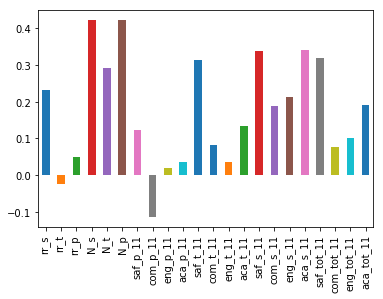

In [70]:
# we will now plot the above data
# first import the data plotting library
%matplotlib inline

# filter the 'correlations' series on the survey fields, and plot the data as a bar chart
correlations[survey_fields].plot.bar()

## Findings and Analysis

- There are high correlations between 'N_s', 'N_t', 'N_p' (which represent numbers of students, teacher and parents) and 'sat_score'. Since these columns are correlated with total_enrollment, it makes sense that they would be high.


- The 'rr_s' (student response rate), or the percentage of students that completed the survey, correlates with 'sat_score'. This makes sense because students who are more likely to fill out surveys may be more likely to also be doing well academically.


- How teachers and students perceived safety ('saf_t_11' and 'saf_s_11') correlate well with 'sat_score'. This make sense, as it's hard to teach or learn in an unsafe environment.


- The last correlation is 'aca_s_11', which indicates how the student perceives academic standards, which correlates with 'sat_score', but this is not true for 'aca_t_11' (how teachers perceive academic standards) or 'aca_p_11' (how parents perceive academic standards)

## SAT Score and Safety

We will explore the correlation between 'Sat Score' and the student survey satisfaction score 'saf_s_11'

We will plot the correlation using a scattergraph

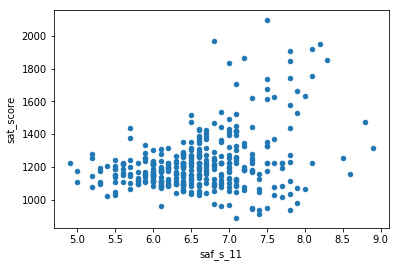

In [71]:
combined.plot.scatter("saf_s_11", "sat_score")

We can see there is a correlation between SAT scores and safety, although it isn't that strong. It looks like there are a few schools with extremely high SAT scores and high safety scores. There are a few schools with low safety scores and low SAT scores. We can see that no school with a safety score lower than 6.5 has an average SAT score higher than 1500 or so.

## SAT Scores and Races

We will now explore correlations between 'Sat Score' and races

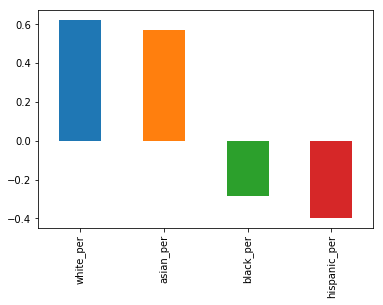

In [72]:
# store just the race columns
race_fields = ["white_per", "asian_per", "black_per", "hispanic_per"]

# filter the 'correlations' series on the race fields, and plot the data as a bar chart
correlations[race_fields].plot.bar()

We can see looks the higher percentage of white or asian students correlate positively with sat score, whereas a higher percentage of black or hispanic students correlate negatively with sat score. This may be due to a lack of funding for schools in certain areas, which are more likely to have a higher percentage of black or hispanic students.

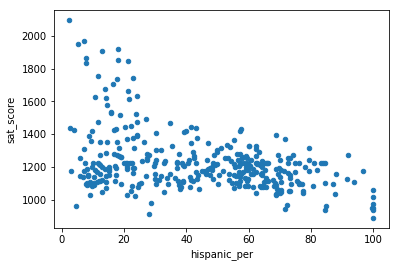

In [73]:
# we can check our analysis by showing a correlation between 'sat score' and 'hispanic_per'
# we can see a slightly negative correlation
combined.plot.scatter("hispanic_per", "sat_score")

In [75]:
# we will investigate the schools with a higher percentage of hispanic students
# we will filter on schools where 'hispanic_per' is above 95
print(combined[combined["hispanic_per"] > 95]["SCHOOL NAME"])

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


The schools above are geared towards recent immigrants to the US. As these schools have a lot of students who are learning English, this could explain the lower SAT scores.

In [76]:
# we will investigate schools with a lower 'hispanic' percentage, but with high sat scores
print(combined[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800)]["SCHOOL NAME"])

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


Many of the schools above are specialised science and technology schools that receive extra funding, and only admit students who pass an entrance exam. This doesn't explain the low hispanic_per, but it does explain why their students tend to do better on the SAT.

## SAT Scores and Gender

We will now explore correlations between 'Sat Score' and gender

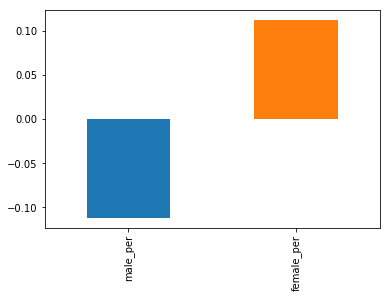

In [77]:
# store just the gender columns
gender_fields = ["male_per", "female_per"]

# filter the 'correlations' series on the gender fields, and plot the data as a bar chart
correlations[gender_fields].plot.bar()

In the plot above, we can see that a high percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score. However, neither correlation is extremely strong.

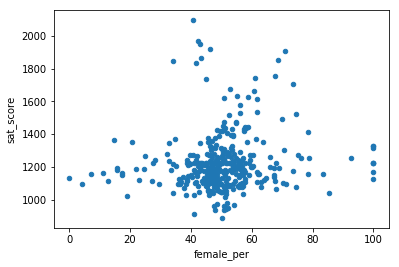

In [78]:
# we can check our analysis by showing a correlation between 'sat score' and 'female_per'
combined.plot.scatter("female_per", "sat_score")

Based on the scatterplot, there doesn't seem to be any real correlation between sat_score and female_per. However, there is a cluster of schools with a high percentage of females (60 to 80), and high SAT scores. Let's investigate these schools further.

In [79]:
# filter on schools with a higher female percentage where Sat Score is higher than 1700
print(combined[(combined["female_per"] > 60) & (combined["sat_score"] > 1700)]["SCHOOL NAME"])

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


We can see these schools are very selective liberal arts schools that have high academic standards

## SAT Scores and AP Scores

We will now explore correlations between 'Sat Score' and 'AP Score'. The Advanced Placement (AP) exam results are additional exams for each high school (where passing an optional AP exam in a particular subject can earn a student college credit in that subject).

First we need to calculate, for each school, the proportion of students who took the AP exam.

In [83]:
# create new column 'ap_per' representing the proportion of students who took the AP exam
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]

In [84]:
# show the new column
combined["ap_per"].head()

0    0.305756
1    0.098985
2    0.031773
3    0.351577
4    0.158091
Name: ap_per, dtype: float64

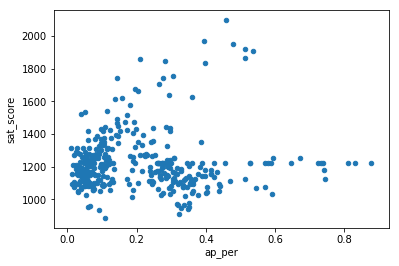

In [85]:
# create a scatter plot showing the relationship between 'ap_per' and 'sat_score'
combined.plot.scatter(x='ap_per', y='sat_score')

We can see there is a relationship between the percentage of students in a school who took the AP exam, and their average SAT scores. It's not an extremely strong correlation, though.